In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.base import BaseEstimator

In [2]:
import numpy as np

In [3]:
class MyFakeClassifier(BaseEstimator):
    def fit(self,x,y):
        pass
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)

In [4]:
digits = load_digits()

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
y = (digits.target == 7).astype(int)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,y,random_state=11)

In [8]:
print('레이블 데스트 세트 크기',y_test.shape)
print('')

레이블 데스트 세트 크기 (450,)



In [9]:
fakeclf = MyFakeClassifier()
fakeclf.fit(x_train,y_train)
fakepred = fakeclf.predict(x_test)
print(accuracy_score(y_test,fakepred))

0.9


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [11]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [12]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:4f}, 정밀도:{1:4f},재현율:{2:4f}'.format(accuracy,precision,recall))

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing



In [25]:
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:-1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature]= le.transform(df[feature])
    return df

In [26]:
def drop_features(df):
    df.drop(['PassengerId','Name', 'Ticket'],axis = 1,inplace = True)
    return df

In [27]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

In [28]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [29]:



titanic_df =pd.read_csv('../data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df=titanic_df.drop('Survived',axis = 1)
x_titanic_df = transform_features(x_titanic_df)

In [30]:
x_train,x_test,y_train, y_test = train_test_split(x_titanic_df,y_titanic_df,test_size=0.20,random_state=11)

In [31]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
pred=lr_clf.predict(x_test)
get_clf_eval(y_test,pred)

C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


오차행렬
[[108  10]
 [ 11  50]]
정확도:0.882682, 정밀도:0.833333,재현율:0.819672


In [42]:
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print(pred_proba.shape)

(179, 2)


In [43]:
from sklearn.preprocessing import Binarizer

In [44]:
binarizer=Binarizer(threshold=1.1)

In [45]:
X=[[1,-1,2],[2,0,0],[0,1.1,1.2]]

In [46]:
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [47]:
from sklearn.preprocessing import Binarizer


In [48]:
custom_threshold=0.5

In [49]:
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

In [50]:
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)

In [51]:
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[108  10]
 [ 11  50]]
정확도:0.882682, 정밀도:0.833333,재현율:0.819672


In [53]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,-1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[99 19]
 [ 9 52]]
정확도:0.843575, 정밀도:0.732394,재현율:0.852459


In [59]:
# page 161
import numpy as np
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]
precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_class1)

In [60]:
print('반환된 분류 결정 임곗값 배열의 Shape',thresholds.shape)

반환된 분류 결정 임곗값 배열의 Shape (144,)


In [62]:
thr_index = np.arange(0,thresholds.shape[0],15)

In [63]:
print('샘플 추출을 위함 임계값 배열의 index 10개',thr_index)
print('샘플용 10개의 임계값:',np.round(thresholds[thr_index],2))

샘플 추출을 위함 임계값 배열의 index 10개 [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임계값: [0.1  0.12 0.13 0.18 0.3  0.4  0.53 0.66 0.83 0.93]


In [64]:
#15step 단위로 추출된 임계값에 따른 정밀도와 재현을 값
print('샘플 임계값별 정밀도',np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율',np.round(recalls[thr_index],3))

샘플 임계값별 정밀도 [0.386 0.437 0.462 0.534 0.64  0.732 0.857 0.95  0.96  1.   ]
샘플 임계값별 재현율 [1.    0.967 0.902 0.902 0.902 0.852 0.787 0.623 0.393 0.164]


In [78]:
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값',custom_threshold)
        get_clf_eval(y_test,custom_predict)

In [66]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

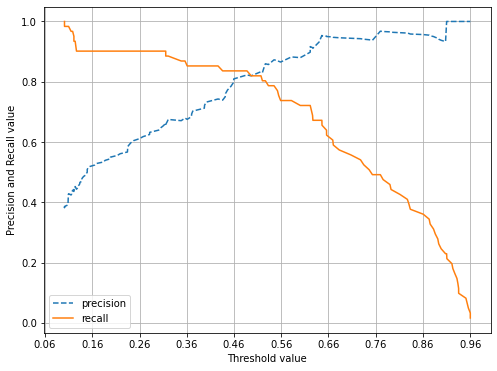

In [72]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(x_test)[:,-1])

In [73]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
print('F1 score: {}'.format(f1))

F1 score: 0.8264462809917356


In [79]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:4f}, 정밀도:{1:4f},재현율:{2:4f},F1:{3:4f}'.format(accuracy,precision,recall,f1))

thresholds = [0.4,0.45,0.50,0.55,0.60]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test,pred_proba[:,-1].reshape(-1,1),thresholds)

임계값 0.4
오차행렬
[[99 19]
 [ 9 52]]
정확도:0.843575, 정밀도:0.732394,재현율:0.852459,F1:0.787879
임계값 0.45
오차행렬
[[104  14]
 [ 10  51]]
정확도:0.865922, 정밀도:0.784615,재현율:0.836066,F1:0.809524
임계값 0.5
오차행렬
[[108  10]
 [ 11  50]]
정확도:0.882682, 정밀도:0.833333,재현율:0.819672,F1:0.826446
임계값 0.55
오차행렬
[[111   7]
 [ 14  47]]
정확도:0.882682, 정밀도:0.870370,재현율:0.770492,F1:0.817391
임계값 0.6
오차행렬
[[112   6]
 [ 17  44]]
정확도:0.871508, 정밀도:0.880000,재현율:0.721311,F1:0.792793


In [80]:
from sklearn.metrics import precision_recall_curve
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

In [81]:
precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_class1)

In [82]:
print(thresholds.shape)

(144,)


In [83]:
from sklearn.metrics import roc_curve

In [84]:
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

In [85]:
thr_index = np.arange(0,thresholds.shape[0],5)

In [86]:
print(thr_index)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140]


In [87]:
print(np.round(thresholds[thr_index],2))

[0.1  0.11 0.11 0.12 0.12 0.13 0.13 0.14 0.15 0.18 0.22 0.25 0.3  0.32
 0.37 0.4  0.45 0.5  0.53 0.58 0.63 0.66 0.73 0.78 0.83 0.88 0.91 0.93
 0.95]


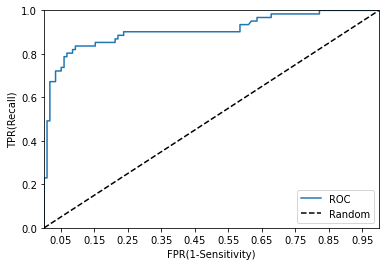

In [91]:
def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label = 'Random')
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
roc_curve_plot(y_test,pred_proba[:,-1])
                   